# Part I - Prosper Loans
## by Adam Arce

## Table of Contents
* [1. Introduction](#first-bullet)
* [2. Preliminary Wrangling](#second-bullet)
  * [2.1 Import Libraries and load dataset](#second-bullet-first-point)
  * [2.2 Check for missing and duplicated entries](#second-bullet-second-point)
  * [2.3 Clean dataset for Visualizations](#second-bullet-third-point)
* [3. Univariate Exploration](#third-bullet)
  * [3.1 Quantitative data](#third-bullet-first-point)
  * [3.2 Qualitative data](#third-bullet-second-point)
  * [3.3 Univariate Reflection](#third-bullet-third-point)
* [4. Bivariate Exploration](#forth-bullet)
  * [4.1 Correlation Plot](#forth-bullet-first-point)
  * [4.2 Regression Plot](#forth-bullet-second-point)
  * [4.4 Bivariate Reflection](#forth-bullet-forth-point)
* [5. Multivariate Exploration](#fifth-bullet)
  * [5.1 BorrowerAPR vs Qualitative data](#fifth-bullet-first-point)
  * [5.2 High-Rate Subset](#fifth-bullet-second-point)
  * [5.3 Multivariate Reflection](#fifth-bullet-third-point)
* [6. Conclusion](#sixth-bullet)
---

## 1. Introduction  <a class="anchor" id="first-bullet"></a>

This report is a visual analysis of the Prosper Loan dataset. The data includes more than 100k loans recorded with 81 columns describing both loan and borrower information. I am interested in what factors may affect **BorrowerAPR**. 



## 2. Preliminary Wrangling  <a class="anchor" id="second-bullet"></a>

In these first steps I will set up the Jupyter notebook environment, then gather, assess, and clean our dataset.

### 2.1 Import Libraries and load dataset  <a class="anchor" id="second-bullet-first-point"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(0)

In [2]:
#Load Prosper Loan data .csv into Pandas DataFrame
df = pd.read_csv('data/prosperLoanData.csv')
df.shape

(113937, 81)

**Dataset contains 113,937 rows with 81 columns**

### 2.2 Check for missing and duplicated entries  <a class="anchor" id="second-bullet-second-point"></a>

In [3]:
#Check for duplicated rows
print('Number of duplicated rows =',df.duplicated().sum())

#Show all columns
pd.set_option('display.max_columns', None)#show all columns
#Select a random 10 entries
df.sample(10)

Number of duplicated rows = 0


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
38063,C00C3389217279034770B0C,132526,2007-05-04 01:19:25.240000000,C,36,Defaulted,2009-01-15 00:00:00,0.20735,0.2000,0.1900,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Full-time,57.0,False,True,C9643379247860156A00EC0,2007-04-20 21:11:44.560000000,640.0,659.0,1998-01-12 00:00:00,24.0,19.0,41.0,14,297.0,3.0,8.0,0.0,0.0,0.0,1.0,0.0,6654.0,0.71,1698.0,39.0,0.89,6.0,0.69,"$25,000-49,999",True,3155.833333,585B3388502861754F99F7A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,20.0,82,15012,10000,2007-05-16 00:00:00,Q2 2007,10FB33869650734352EC110,371.64,5574.6000,3473.13,2101.4700,-105.08,0.0,6526.88,6526.87,0.0,1.0000,0,0,0.0,112
87263,AB3D36002538203969596DC,1106848,2014-01-13 18:10:01.847000000,NaN,60,Current,NaN,0.21166,0.1875,0.1775,0.16463,0.0824,0.08223,4.0,C,5.0,1,NY,Professional,Employed,68.0,True,False,NaN,2014-01-13 18:10:01,640.0,659.0,1988-07-01 00:00:00,5.0,4.0,10.0,2,50.0,6.0,11.0,1.0,897.0,14.0,2.0,0.0,955.0,0.03,24995.0,10.0,0.60,1.0,0.07,"$75,000-99,999",True,7583.333333,48B33703741909495ACCC02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126624,5500,2014-01-16 00:00:00,Q1 2014,AA523702905877243AD7C3D,141.92,141.9200,54.33,87.5900,-4.67,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,91
96597,47813563612952699A8B78F,677642,2012-11-27 10:35:43.690000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,0.27990,0.1675,0.11240,1.0,HR,4.0,1,CA,Other,Employed,124.0,False,False,NaN,2012-11-27 10:35:40,660.0,679.0,1990-09-01 00:00:00,39.0,35.0,77.0,18,743.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,20069.0,0.52,12498.0,68.0,0.97,1.0,0.83,"$50,000-74,999",True,4583.333333,34D436691696074776A81B2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,15,79510,2858,2012-12-19 00:00:00,Q4 2012,9718356482234121683B7D4,124.11,1737.5400,806.41,931.1300,-29.31,0.0,0.00,0.00,0.0,0.7144,0,0,0.0,60
19881,E9893599579934701836615,1119291,2014-01-06 16:54:04.067000000,NaN,60,Current,NaN,0.16969,0.1465,0.1365,0.12898,0.0549,0.07408,5.0,B,9.0,1,CT,Tradesman - Mechanic,Employed,211.0,True,False,NaN,2013-12-31 05:33:01,660.0,679.0,2004-03-18 00:00:00,11.0,11.0,33.0,7,306.0,1.0,17.0,0.0,0.0,60.0,1.0,0.0,7976.0,0.82,1129.0,26.0,0.65,1.0,0.25,"$50,000-74,999",True,4946.583333,58EE37039789657931B5C66,1.0,1.0,1.0,0.0,0.0,3500.0,0.0,-4.0,0,NaN,2,126570,6500,2014-01-16 00:00:00,Q1 2014,055636977154202688794E8,153.44,150.8311,72.56,78.2711,-5.52,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
47032,F8AE3590036950392362445,917115,2013-09-21 10:43:37.163000000,NaN,60

**A visual assessment of the dataset shows the following,**

- **No duplicated rows**
- **missing values in some columns**
- **many irrelevant columns for our analyis**


In [4]:
#Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**A programmatic assessment shows us the extent of missing values observed in the visual assessment.**

### What is the structure of your dataset?

> The properLoanData.csv file loads into a 113,937 row by 81 column DataFrame. This appears to represent 113,937 loan records with 81 variables describing the loan or borrower.


### What is/are the main feature(s) of interest in your dataset?

> The main features that I am interested in are **BorrowerAPR**, as well as any factors that may help predict them.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following variables may contribute to the main focus of the dataset,
> - Term
> - EmploymenmtStatus
> - CreditScoreRangeUpper
> - AvailableBankcardCredit
> - IncomeVerifiable
> - StatedMonthlyIncome

### 2.3 Clean dataset for Visualizations  <a class="anchor" id="second-bullet-third-point"></a>

In [5]:
#Make clean copy
df_clean = df.copy()
#Remove irrelevant columns
df_clean.drop(['ListingNumber', 'LoanStatus', 'ClosedDate', 'ProsperRating (Alpha)', 'ProsperRating (numeric)',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'CreditGrade',
        'ListingCategory (numeric)', 'Occupation', 'EmploymentStatusDuration','ProsperScore',
        'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled','BorrowerState',
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines','CreditScoreRangeLower',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies','AmountDelinquent',
        'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization', 'TotalTrades','DebtToIncomeRatio',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'LoanKey', 
        'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
        'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding','BorrowerRate',
        'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 
        'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber',
        'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment',
        'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 
        'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 
        'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 
        'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
        'Investors'],axis=1,inplace=True)

In [6]:
#Visually Assess clean DataFrame
df_clean.sample(20)

,ListingKey,ListingCreationDate,Term,BorrowerAPR,EmploymentStatus,CreditScoreRangeUpper,AvailableBankcardCredit,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
42919,16883550024355768317459,2012-06-25 15:33:21.823000000,36,0.18316,Other,699.0,231.0,"$1-24,999",True,1658.000000,8500
109048,23EE3602675784655D1F3CF,2014-02-09 13:54:26.137000000,60,0.16328,Employed,719.0,50384.0,"$50,000-74,999",True,5416.666667,20000
4941,4B733525460563102313D1E,2011-09-07 13:57:23.383000000,36,0.16056,Employed,759.0,9723.0,"$50,000-74,999",True,5416.666667,2500
91880,A8E134171597541476234C5,2008-03-20 15:17:33.127000000,36,0.13068,Full-time,659.0,19510.0,"$100,000+",True,8500.000000,3500
2229,2A5F3572839239430F78385,2013-03-20 07:25:30.807000000,60,0.17061,Employed,779.0,2108.0,"$50,000-74,999",True,5515.000000,8500
11651,DB2B35513465630070EA499,2012-07-06 06:34:42.027000000,36,0.35797,Employed,719.0,0.0,"$50,000-74,999",True,5333.333333,3600
57339,7E8B3581542354325F2C058,2013-06-04 13:23:52.943000000,60,0.22693,Employed,679.0,4192.0,"$75,000-99,999",True,7333.333333,15000
14896,3FDD35931597577955A2E54,2013-10-22 14:27:46.017000000,36,0.21342,Other,699.0,21490.0,"$50,000-74,999",True,4583.333333,15000
21377,68D334076281250778354AF,2007-12-15 19:11:27.937000000,36,0.13202,Retired,739.0,439.0,"$1-24,999",True,1035.000000,7500
102255,F4F835983555189298A9E10,2013-12-26 15:58:43.503000000,60,0.21474,Employed,679.0,52.0,"$25,000-49,999",True,2250.000000,2200


**The clean DataFrame already feels less cluttered.**

In [7]:
#Get clean DataFrame info
df_clean.info()
#Show number of missing values
print('\nNumber of missing BorrowerAPR =',df_clean.shape[0] - df_clean.BorrowerAPR.value_counts().sum())
print('\nNumber of missing EmploymentStatus =',df_clean.shape[0] - df_clean.EmploymentStatus.value_counts().sum())
print('\nNumber of missing CreditScoreRange =',df_clean.shape[0] - df_clean.CreditScoreRangeUpper.value_counts().sum())
print('\nNumber of missing AvailableBankcardCredit =',df_clean.shape[0] - df_clean.AvailableBankcardCredit.value_counts().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingKey               113937 non-null  object 
 1   ListingCreationDate      113937 non-null  object 
 2   Term                     113937 non-null  int64  
 3   BorrowerAPR              113912 non-null  float64
 4   EmploymentStatus         111682 non-null  object 
 5   CreditScoreRangeUpper    113346 non-null  float64
 6   AvailableBankcardCredit  106393 non-null  float64
 7   IncomeRange              113937 non-null  object 
 8   IncomeVerifiable         113937 non-null  bool   
 9   StatedMonthlyIncome      113937 non-null  float64
 10  LoanOriginalAmount       113937 non-null  int64  
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 8.8+ MB

Number of missing BorrowerAPR = 25

Number of missing EmploymentStatus = 2255

Number of missing Credi

**Although most of this missing info can be tolerated, the 25 records missing BorrowerAPR will be ommitted since we are interested this variable as part of our main focus.**

In [8]:
#Remove records with missing BorrowerAPR values
df_clean = df_clean[~df_clean.BorrowerAPR.isna()]

## 3. Univariate Exploration <a class="anchor" id="third-bullet"></a>

The variables **BorrowerAPR** lie at the center of this visual analysis. Their distributions will inform us how factors may affect them. Both are continuous Quantitative data, thus their distribution are best represented with histograms. 

To understand potential contributing factors we will plot the distributions of **StatedMonthlyIncome** and **LoanOriginalAmount** as histograms, while **Term**, **EmploymentStatus**, and **IncomeRange** will be plotted as bar plots.


### 3.1 Quantitative data <a class="anchor" id="third-bullet-first-point"></a>


<AxesSubplot:xlabel='BorrowerAPR', ylabel='Count'>

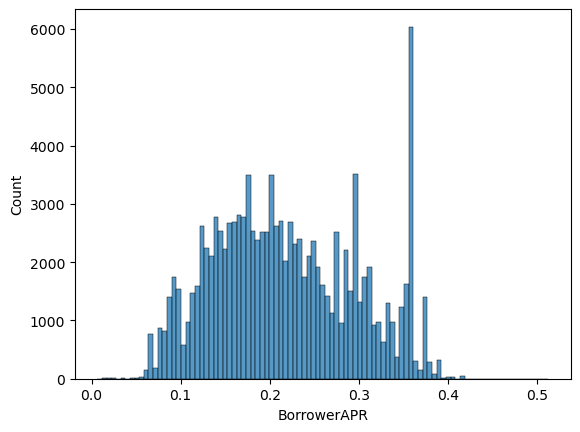

In [9]:
#Using seaborn histplot function
sns.histplot(data=df_clean, x="BorrowerAPR")

**A quick plot of the BorrowAPR histogram shows,**

- **bin size is too small**
- **outliers skews the x-limit right**
- **needs a title defining the variable**

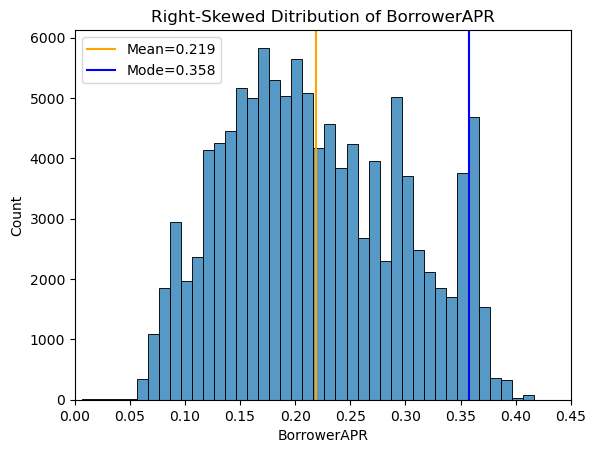

In [10]:
#Using seaborn histplot function
sns.histplot(data=df_clean, x="BorrowerAPR",binwidth=0.01)
plt.title('Right-Skewed Ditribution of BorrowerAPR')
plt.axvline(df_clean.BorrowerAPR.mean(),c='orange',label=f'Mean={df_clean.BorrowerAPR.mean():0.3f}')
plt.axvline(df_clean.BorrowerAPR.mode()[0],c='blue',label=f'Mode={df_clean.BorrowerAPR.mode()[0]:0.3f}')
plt.xlim(0,0.45)
plt.legend()

In [11]:
df_clean[df_clean.BorrowerAPR>=0.45]

,ListingKey,ListingCreationDate,Term,BorrowerAPR,EmploymentStatus,CreditScoreRangeUpper,AvailableBankcardCredit,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
18326,0161336483146123835D6A5,2006-03-11 15:43:45.393000000,36,0.45857,NaN,NaN,NaN,Not displayed,True,10000.000000,3000
22195,5686336572505607862C0C7,2006-03-12 13:44:15.060000000,36,0.46201,NaN,NaN,NaN,Not displayed,True,2916.666667,1789
36018,844033650124564886B3EDC,2006-02-23 13:57:02.087000000,36,0.51229,NaN,NaN,NaN,Not displayed,True,2838.000000,1500
56761,A79D33661366830833F3EF5,2006-03-16 19:30:16.753000000,36,0.50633,NaN,NaN,NaN,Not displayed,False,0.000000,3000
82043,BBED336465905564254DC8B,2006-03-02 19:00:17.593000000,36,0.48873,NaN,NaN,NaN,Not displayed,True,1583.333333,3000
103973,95ED3365915044756AB754F,2006-03-06 22:36:53.753000000,36,0.45857,NaN,NaN,NaN,Not displayed,True,3750.000000,2800


**To polish the plot, we set the binwidth to 0.01 and trim the six outliers (>=0.45). We also plot the mean and mode which differ significantly. We observe a right-skewed distribution with a possibly independent peak at the mode (0.36). There may be an secondary peak at 0.30.**

count    3.270000e+02
mean     5.943208e+04
std      1.110936e+05
min      3.016667e+04
25%      3.333333e+04
50%      3.875000e+04
75%      5.162433e+04
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64


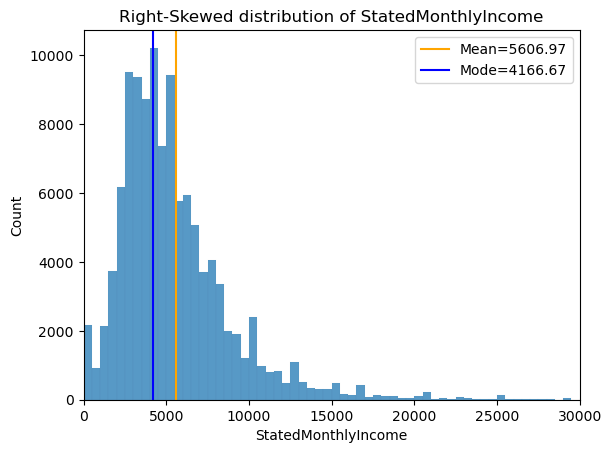

In [12]:
#Using seaborn histplot function
sns.histplot(data=df_clean, x="StatedMonthlyIncome",binwidth=500)
plt.title('Right-Skewed distribution of StatedMonthlyIncome')
plt.axvline(df_clean.StatedMonthlyIncome.mean(),c='orange',label=f'Mean={df_clean.StatedMonthlyIncome.mean():0.2f}')
plt.axvline(df_clean.StatedMonthlyIncome.mode()[0],c='blue',label=f'Mode={df_clean.StatedMonthlyIncome.mode()[0]:0.2f}')
plt.xlim(0,3e4)
plt.legend()

print(df_clean[df_clean.StatedMonthlyIncome>3e4].StatedMonthlyIncome.describe())

**The StatedMonthlyIncome forms a right-skewed distribution with more than 300 outliers having a monthly income stated more than $30,000. Below we log the x-axis.**

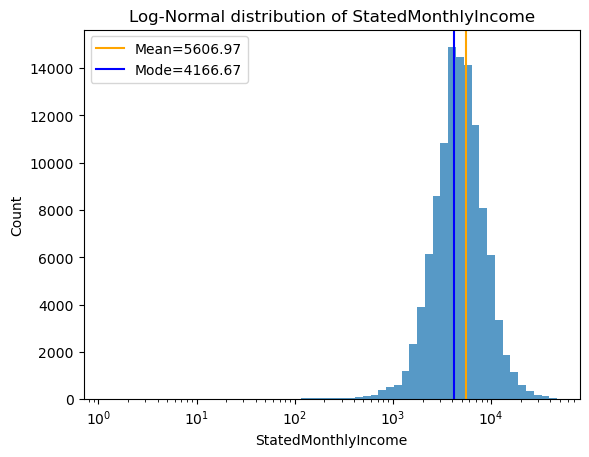

In [13]:
#Using seaborn histplot function
bins =  1.2**np.arange(1, 60)
sns.histplot(data=df_clean, x="StatedMonthlyIncome",bins=bins)
plt.title('Log-Normal distribution of StatedMonthlyIncome')
plt.axvline(df_clean.StatedMonthlyIncome.mean(),c='orange',label=f'Mean={df_clean.StatedMonthlyIncome.mean():0.2f}')
plt.axvline(df_clean.StatedMonthlyIncome.mode()[0],c='blue',label=f'Mode={df_clean.StatedMonthlyIncome.mode()[0]:0.2f}')
plt.xscale('log')
plt.legend()

**It apears to be a Log-Normal distribution.**

Text(0.5, 1.0, 'Right-Skewed Distribution of LoanOriginalAmount')

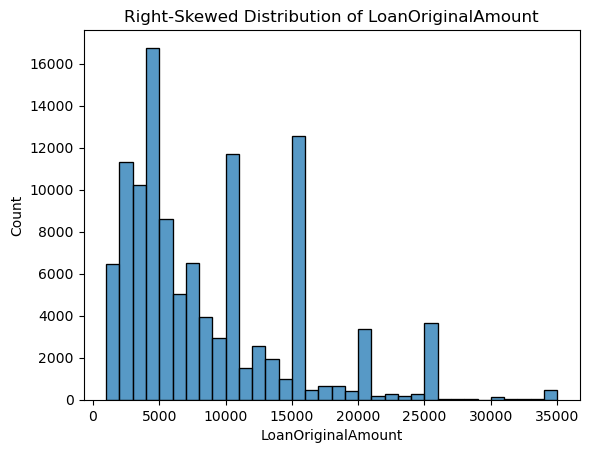

In [14]:
#Using seaborn histplot function
sns.histplot(data=df_clean, x="LoanOriginalAmount",binwidth=1000)
plt.title('Right-Skewed Distribution of LoanOriginalAmount')

**No special visual analysis needed for the LoanOriginalAmount which also forms a right-skewed distribution. Several peaks appear at round numbers (i.e., 5000, 10000, 15000, etc.). Perhaps these round numbers are related to the high-rate peaks in BorrowerAPR.**


### 3.2 Qualitative Data <a class="anchor" id="third-bullet-second-point"></a>


<AxesSubplot:xlabel='Term', ylabel='count'>

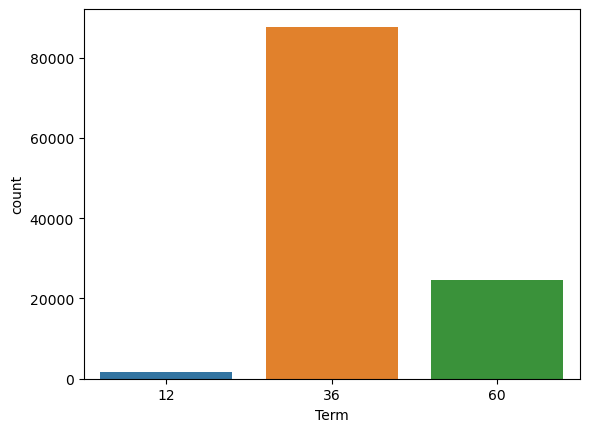

In [15]:
#Using seaborn countplot function
sns.countplot(data=df_clean, x="Term")

**A quick bar plot produces a lor a chart junk which can be removed.**

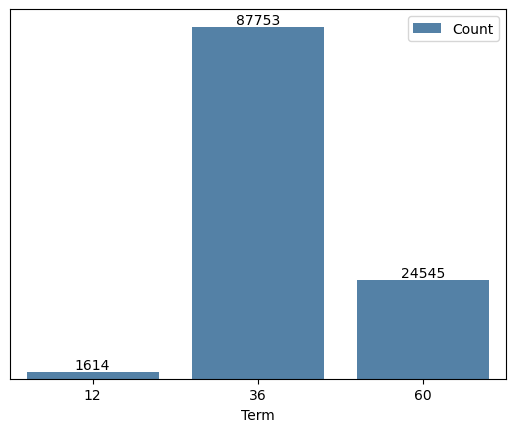

In [16]:
#Using seaborn countplot function
ax = sns.countplot(data=df_clean, x="Term",color='steelblue',label='Count')
ax.bar_label(ax.containers[0])
ax.set(yticklabels=[],ylabel=None)
ax.tick_params(left=False)
plt.legend()

**Much cleaner view shows us that the majority of Term data are 36 months.**

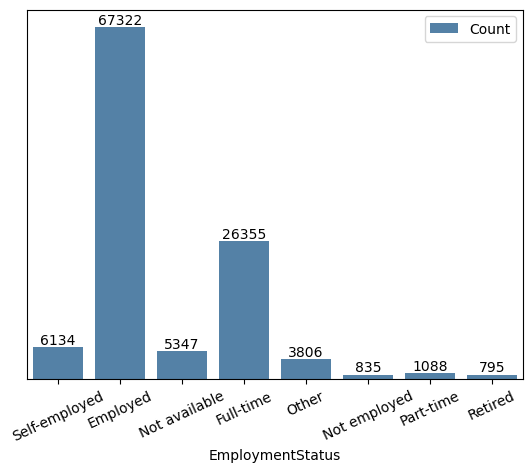

In [17]:
#Using seaborn countplot function
ax = sns.countplot(data=df_clean, x="EmploymentStatus",color='steelblue',label='Count')
ax.bar_label(ax.containers[0])
ax.set(yticklabels=[],ylabel=None)
ax.tick_params(left=False)
plt.xticks(rotation=25)
plt.legend()

**Perhaps the categories could be rearranged in decending order.**

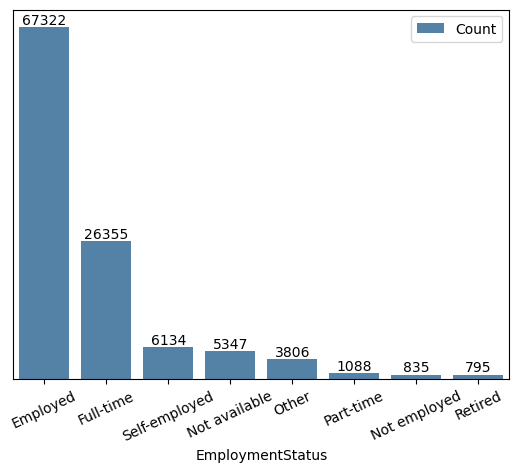

In [18]:
#Using seaborn countplot function
ax = sns.countplot(data=df_clean, x="EmploymentStatus",color='steelblue',label='Count',
                      order=['Employed','Full-time','Self-employed','Not available','Other',
                             'Part-time','Not employed','Retired'])
ax.bar_label(ax.containers[0])
ax.set(yticklabels=[],ylabel=None)
ax.tick_params(left=False)
plt.xticks(rotation=25)
plt.legend()

**After reordering the categories and rotating the x-tick labels, we see that the majority of borrowers are employed.**

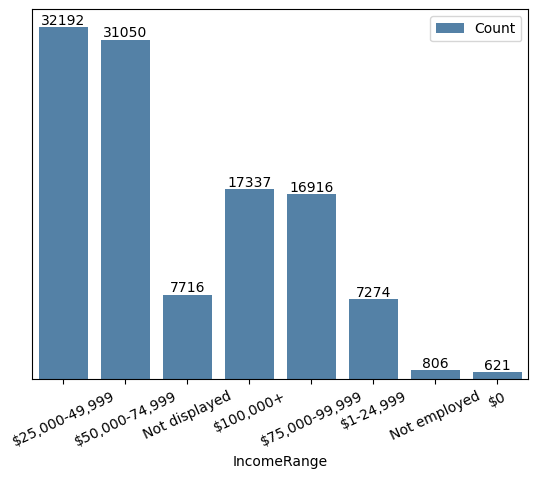

In [19]:
#Using seaborn countplot function
ax = sns.countplot(data=df_clean, x="IncomeRange",color='steelblue',label='Count')
ax.bar_label(ax.containers[0])
ax.set(yticklabels=[],ylabel=None)
ax.tick_params(left=False)
plt.xticks(rotation=25)
plt.legend()

**Needs polishing**

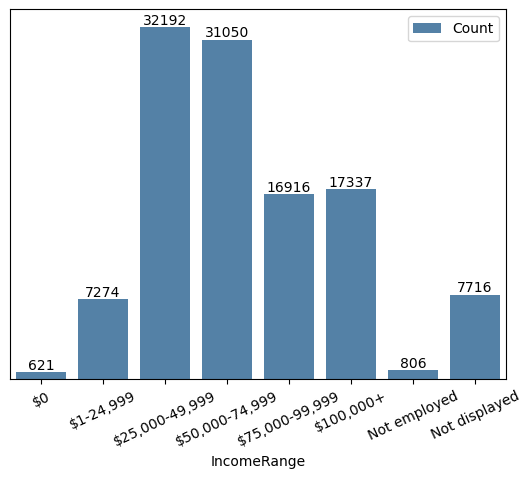

In [20]:
#Using seaborn countplot function
ax = sns.countplot(data=df_clean, x="IncomeRange",color='steelblue',label='Count',
                      order=['$0','$1-24,999','$25,000-49,999','$50,000-74,999',
                             '$75,000-99,999','$100,000+','Not employed','Not displayed'])
ax.bar_label(ax.containers[0])
ax.set(yticklabels=[],ylabel=None)
ax.tick_params(left=False)
plt.xticks(rotation=25)
plt.legend()

**We similarily had to reorder the categories but in a more intuitive order.**

### 3.3 Univariate Reflection <a class="anchor" id="third-bullet-third-point"></a>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both BorrowerAPR form right-skewed distributions with independent high-rate peaks. The major peak in each distribution aligns with the mode. Additionaly, some high-rate outliers were omitted from the graph by defining the x-limits to contain the body of each ditribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The StatedMonthlyIncome appeared to be a right-skewed distribution. However, with 300+ outliers I tried to log the x-axis. Doing so showed that this variable formed a log-normal distribution, with a mean around $5000. Other than that, other qualitative variables required reordering. EmploymentStatus is a nominal set, thus could be ordered in descending order. Whereas, IncomeRange as an ordinal set, needed to be reordered by category values.

## 4. Bivariate Exploration  <a class="anchor" id="forth-bullet"></a>

To find what factors influence **BorrowerAPR**, we will look at bivariate relationships amoung the quatitative data.

### 4.1 Correlation plot <a class="anchor" id="forth-bullet-first-point"></a>

This requires dividing the variables into a qualitative group and quantitative group.

In [21]:
print(df_clean.columns.values) 
#define groups 
quan = ['BorrowerAPR','CreditScoreRangeUpper','AvailableBankcardCredit',
        'LoanOriginalAmount']

['ListingKey' 'ListingCreationDate' 'Term' 'BorrowerAPR'
 'EmploymentStatus' 'CreditScoreRangeUpper' 'AvailableBankcardCredit'
 'IncomeRange' 'IncomeVerifiable' 'StatedMonthlyIncome'
 'LoanOriginalAmount']


<AxesSubplot:>

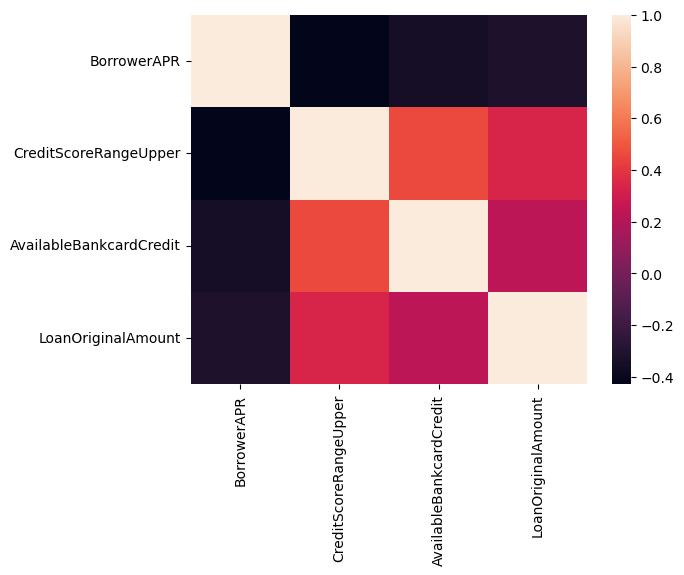

In [22]:
#Using seaborn heatmap function
sns.heatmap(df_clean[quan].corr())

**A quick plot of the correlation coefs show,**

- **needs another color pallette, perhaps divergent**
- **tiles could use annotations**

Text(0.5, 1.0, 'Correlations amoung Quantitative Data')

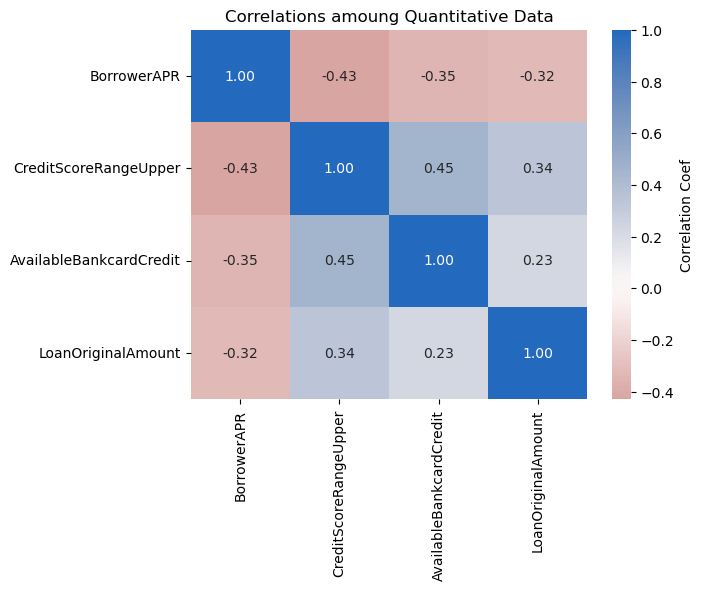

In [23]:
#Using seaborn heatmap function
sns.heatmap(df_clean[quan].corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0,
                cbar_kws={'label': 'Correlation Coef'})
plt.title('Correlations amoung Quantitative Data')

**Each quantitative variable appears to have a negative correlation with BorrowerAPR. Next we will look at each of these relationships.**

# 4.2 Regression Plots  <a class="anchor" id="forth-bullet-second-point"></a>

<AxesSubplot:xlabel='AvailableBankcardCredit', ylabel='BorrowerAPR'>

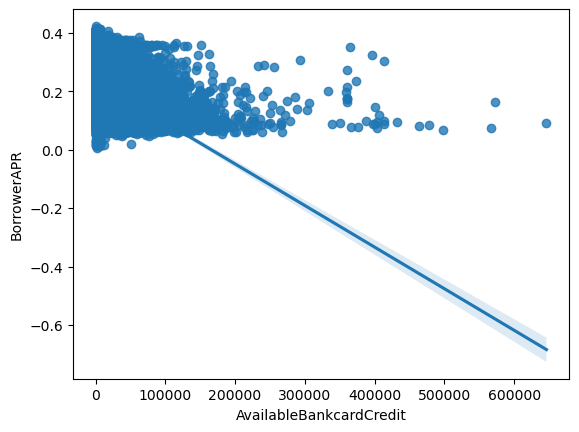

In [24]:
#Using seaborn regplot function
sns.regplot(data=df_clean, x='AvailableBankcardCredit', y='BorrowerAPR')

**A quick plot of the regression model shows,**

- **Trendline does not represent data (skews y-axis)**
- **Point cloud looks cluttered**

**We can illuminate the trend with binned data plotted over a random subset scatterplot.**

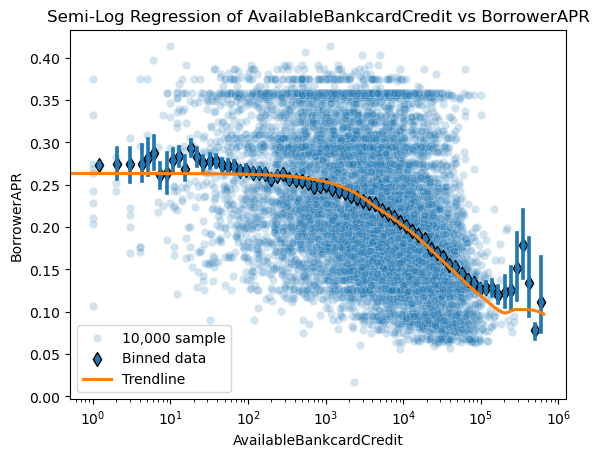

In [25]:
#make reusable function
def plot_regression_scatter(data,x,x_bins,title,log_x=False):
    #Using seaborn regplot function
    sns.scatterplot(data=data.sample(10000), x=x, y='BorrowerAPR', 
                    alpha=0.2, label='10,000 sample')
    sns.regplot(data=data, x=x, y='BorrowerAPR', x_bins= x_bins, lowess=True,marker='d',
                scatter_kws={'ec':'black'}, label='Binned data',
                line_kws={"color": "C1",'label':'Trendline'})
    plt.title(title)
    if log_x: plt.xscale('log')
    plt.legend()  
    
    
data = df_clean
x= 'AvailableBankcardCredit'
x_bins= 1.2**np.arange(1, 80)
title = 'Semi-Log Regression of AvailableBankcardCredit vs BorrowerAPR'
plot_regression_scatter(data,x,x_bins,title,log_x=True)

**The relationship is non-linear, while most data populates the sharp decline in trend. The relationship appears piece-wise, constant BorrowerAPR (0.26) below AvailableBankcardCredit=1000, and negative correlation above** 

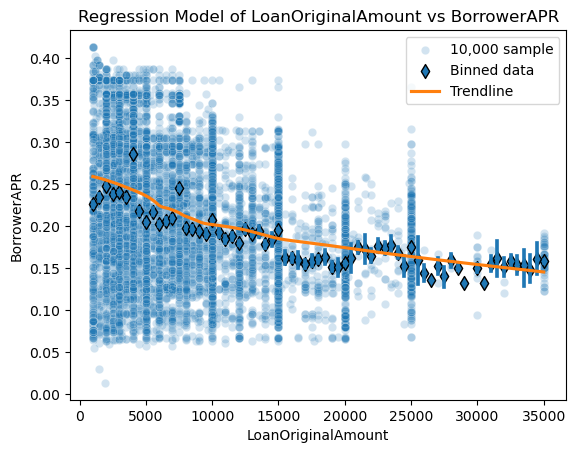

In [26]:
data = df_clean
x= 'LoanOriginalAmount'
x_bins= np.arange(80)*500
title = 'Regression Model of LoanOriginalAmount vs BorrowerAPR'
plot_regression_scatter(data,x,x_bins,title)

**The relationship is non-linear, however, the overall there's a negative correlation.** 

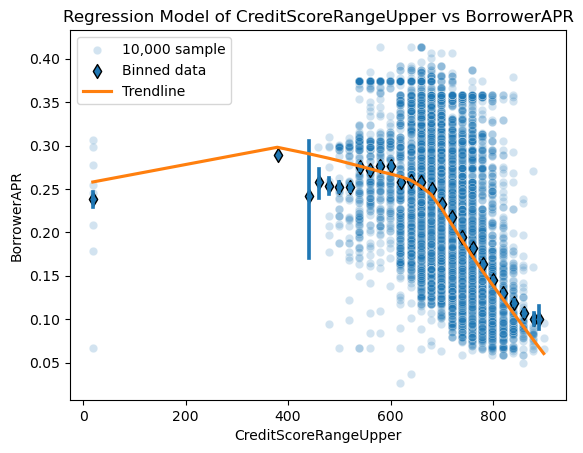

In [27]:
data = df_clean
x= 'CreditScoreRangeUpper'
x_bins= np.arange(90)*10
title = 'Regression Model of CreditScoreRangeUpper vs BorrowerAPR'
plot_regression_scatter(data,x,x_bins,title)

**Similar piece-wise relationship, showing overall negative correlation.**

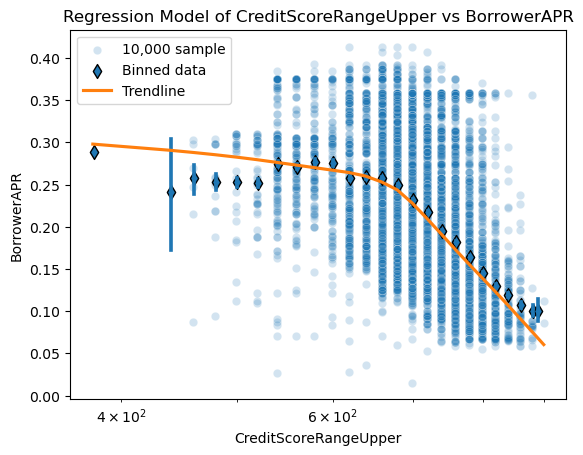

In [28]:
data = df_clean[df_clean.CreditScoreRangeUpper>200]
x= 'CreditScoreRangeUpper'
x_bins= np.arange(90)*10
title = 'Regression Model of CreditScoreRangeUpper vs BorrowerAPR'
plot_regression_scatter(data,x,x_bins,title,log_x=True)

**Closing in on meaningful CreditScore values suggesting a weak neagtive correlation below 700, and strong correlation above.**


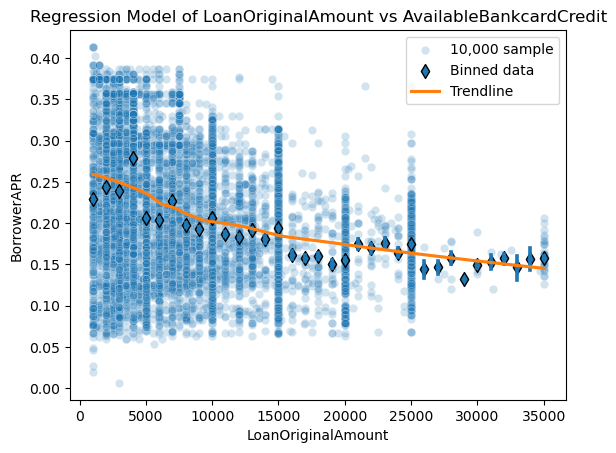

In [29]:
data = df_clean
x= 'LoanOriginalAmount'
x_bins= np.arange(40)*1000
title = 'Regression Model of LoanOriginalAmount vs AvailableBankcardCredit'
plot_regression_scatter(data,x,x_bins,title)

### 4.4 Bivariate Exploration  <a class="anchor" id="forth-bullet-forth-point"></a>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In general, the relationships between **BorrowerAPR** and other quantitative data are negatively correlated.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive correlation between **LoanOriginalAmount** and **AvailableBankcardCredit**.

## 5. Multivariate Exploration  <a class="anchor" id="fifth-bullet"></a>

Digging deeper into what factors influence **BorrowerAPR**, we will look at relationships amoung the **BorrowerAPR** and quantitative data. As well as an analysis of a high-rate subset of entries that have the **BorrowerAPR** mode observed in section 3.


### 5.1 BorrowerAPR vs Qualitative data  <a class="anchor" id="fifth-bullet-first-point"></a>

Text(0.5, 1.0, 'BorrowerAPR vs IncomeRange vs IncomeVerifiable')

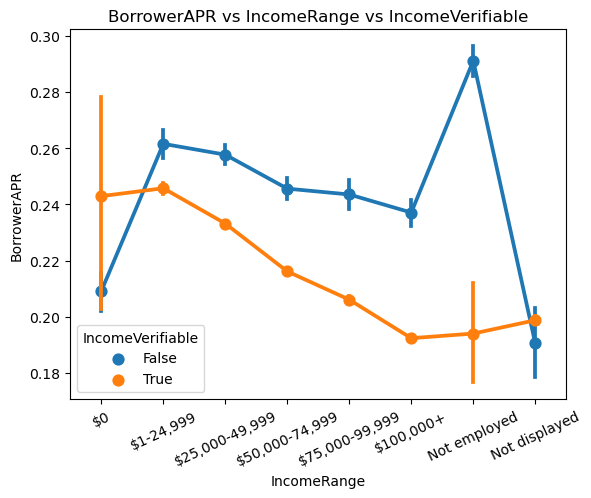

In [30]:
#Using seaborn pointplot function
sns.pointplot(data=df_clean,x='IncomeRange',y='BorrowerAPR',hue='IncomeVerifiable',
             order=['$0','$1-24,999','$25,000-49,999','$50,000-74,999',
                             '$75,000-99,999','$100,000+','Not employed','Not displayed'])
plt.xticks(rotation=25)
plt.title('BorrowerAPR vs IncomeRange vs IncomeVerifiable')

Text(0.5, 1.0, 'BorrowerAPR vs IncomeRange vs Term')

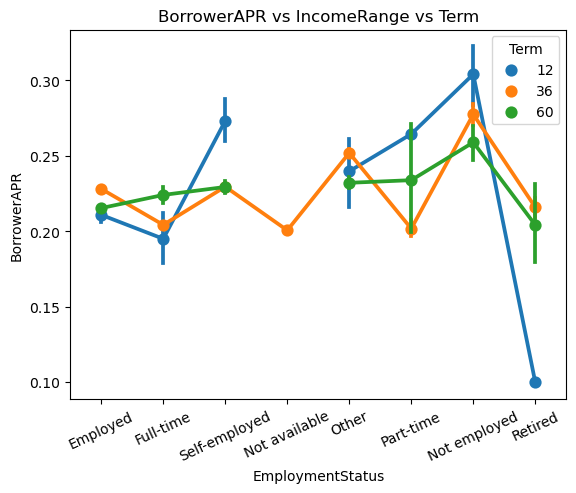

In [31]:
#Using seaborn pointplot function
sns.pointplot(data=df_clean,x='EmploymentStatus',y='BorrowerAPR',hue='Term',
             order=['Employed','Full-time','Self-employed','Not available','Other',
                             'Part-time','Not employed','Retired'])
plt.xticks(rotation=25)
plt.title('BorrowerAPR vs IncomeRange vs Term')

Text(0.5, 0.98, 'Distribtions of BorrowerAPR by EmploymentStatus and IncomeVerifiable')

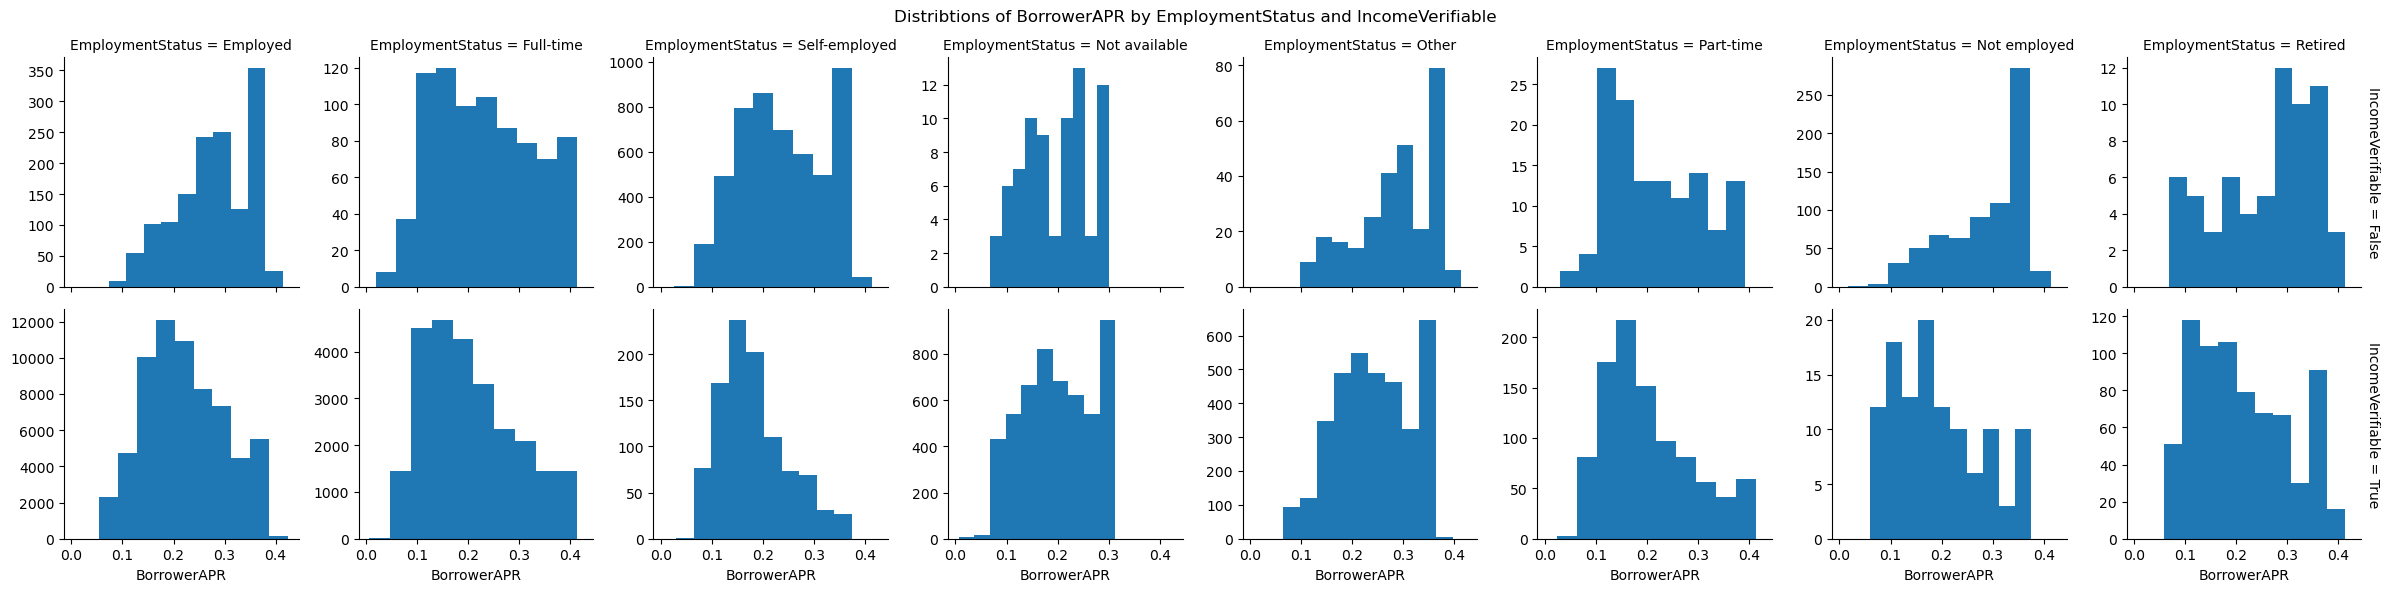

In [32]:
g = sns.FacetGrid(data=df_clean,
                  col='EmploymentStatus',col_order=['Employed','Full-time','Self-employed',
                                                    'Not available','Other','Part-time',
                                                    'Not employed','Retired'], 
                  row='IncomeVerifiable',
                  margin_titles=True, sharey=False)
g.map(plt.hist, 'BorrowerAPR')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribtions of BorrowerAPR by EmploymentStatus and IncomeVerifiable')

### 5.2 High-rate Subset  <a class="anchor" id="fifth-bullet-second-point"></a>

In [33]:
print('BorrowerAPR mode=', df_clean.BorrowerAPR.mode()[0])
df_HR = df_clean[df_clean.BorrowerAPR==0.35797] #high-rate

df_HR.describe()

BorrowerAPR mode= 0.35797


,Term,BorrowerAPR,CreditScoreRangeUpper,AvailableBankcardCredit,StatedMonthlyIncome,LoanOriginalAmount
count,3672.0,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3672.000000
mean,36.0,3.579700e-01,706.516340,4744.053649,5.323454e+03,3530.485022
std,0.0,1.771047e-14,32.263848,8866.015027,2.908509e+04,732.622847
min,36.0,3.579700e-01,619.000000,0.000000,0.000000e+00,2000.000000
25%,36.0,3.579700e-01,679.000000,284.000000,2.640000e+03,3000.000000
50%,36.0,3.579700e-01,699.000000,1656.500000,4.120250e+03,4000.000000
75%,36.0,3.579700e-01,719.000000,5264.000000,6.083333e+03,4000.000000
max,36.0,3.579700e-01,879.000000,150528.000000,1.750003e+06,4000.000000


Text(0.5, 0.98, 'Exploring BorrowerAPR=0.35797')

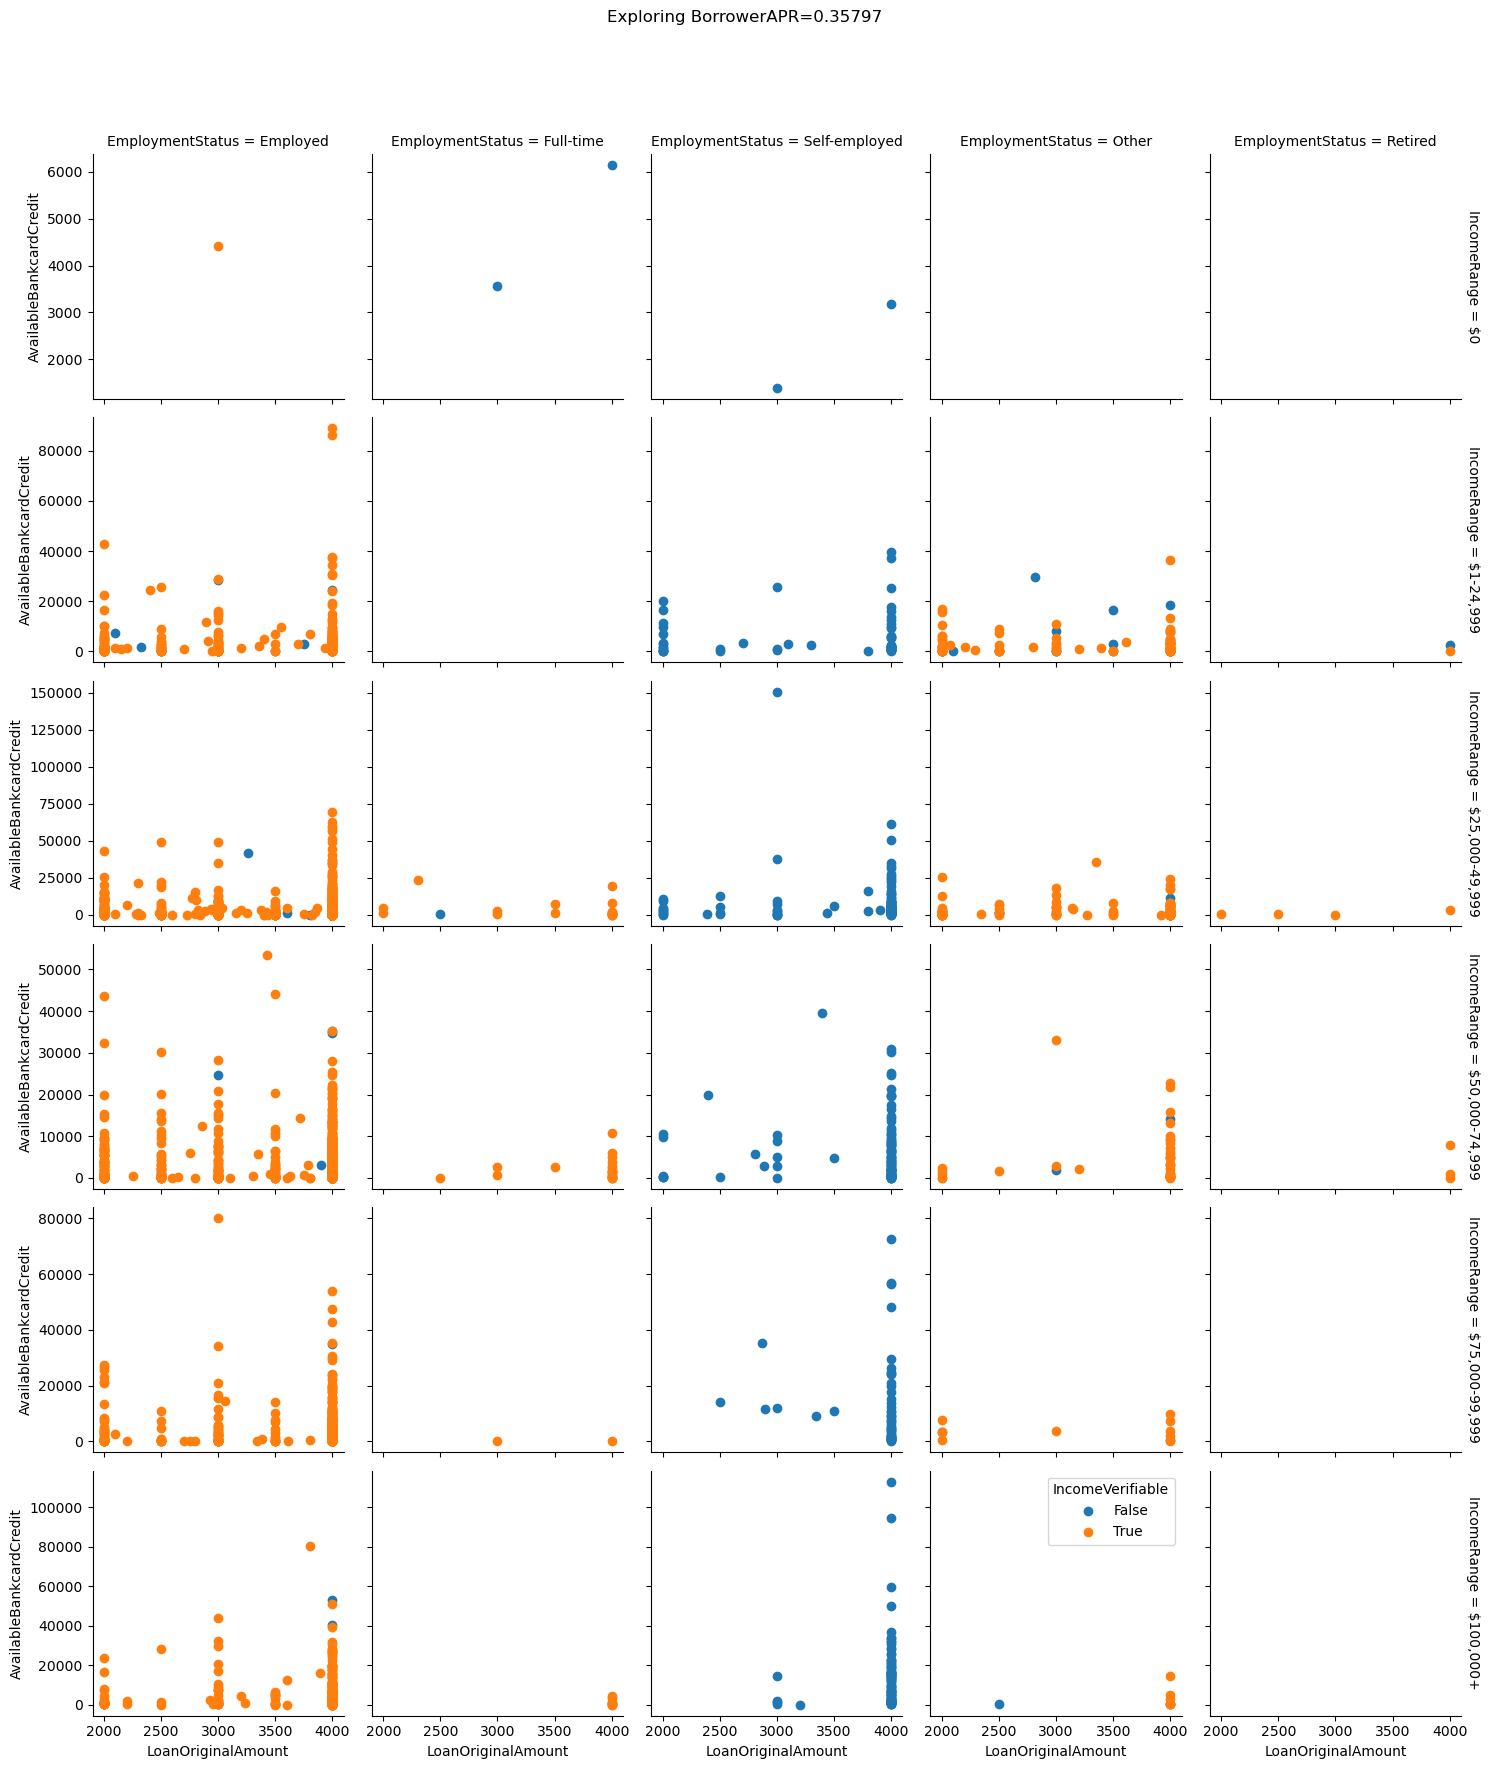

In [36]:
g = sns.FacetGrid(data=df_HR[df_HR.StatedMonthlyIncome<100000],
                  col='EmploymentStatus',col_order=['Employed','Full-time','Self-employed',
                                                    'Other','Retired'], 
                  row = 'IncomeRange', row_order=['$0','$1-24,999','$25,000-49,999',
                                                  '$50,000-74,999','$75,000-99,999',
                                                  '$100,000+'],
                  hue='IncomeVerifiable', margin_titles=True, sharey='row')
g.map(plt.scatter, 'LoanOriginalAmount', 'AvailableBankcardCredit')
plt.legend(title='IncomeVerifiable')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Exploring BorrowerAPR=0.35797')

### 5.3 Multivariate Exploration  <a class="anchor" id="fifth-bullet-third-point"></a>


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Unverified income produced high **BorrowerAPR** values on average for most income ranges, especially if the applicant is unemployed. Similarly, 12 month terms unemployed applicants had higher rates.

> Looking at the high-rate subset, there was no clear factors that stuck out other than the OriginalLoanAmount being between $2000-4000.

### Were there any interesting or surprising interactions between features?

> In the high-rate subset, the majority of unveriafiable incomes were for applicants that were self employed. High-rate peaks are observed if income is unverified or the applicant is Self-employed, not employed, or not employment info is given. 

## 6. Conclusions  <a class="anchor" id="sixth-bullet"></a>

> The goal of the this project was to find what factors contribute to **BorrowerAPR**. The original dataset required little cleaning other than selecting from the original 81 columns and removing entries that had no value for **BorrowerAPR**. In the univariate, we found that **BorrowerAPR** exhibited a right-skewed distribution with a mode forming a secondary peak at 0.35797. Bivariate exploration found that **BorrowerAPR** forms a negative correlation with all other quantitative data. And in the multivariate exploration, we were able to look a high-rate subset that all had **OriginalLoanAmount** ranging $2000-4000. Addition, we observed that unverified income and certain employment statuses were associated with high rates.

> Reflecting back, I realized that there are a myriad ways to visualize data. I orginally set out to include more figures, but similar to chart junk, these extra figures would have cluttered the visual analysis.